In [253]:
import arff
import numpy as np

with open('dataset', 'r') as f:
    file = arff.load(f)
    attributes = file['attributes']
    data = np.array(file['data'])

In [254]:
data

array([[ 5, 64],
       [ 6, 56],
       [12, 50],
       [ 9, 71],
       [15, 44],
       [16, 60]])

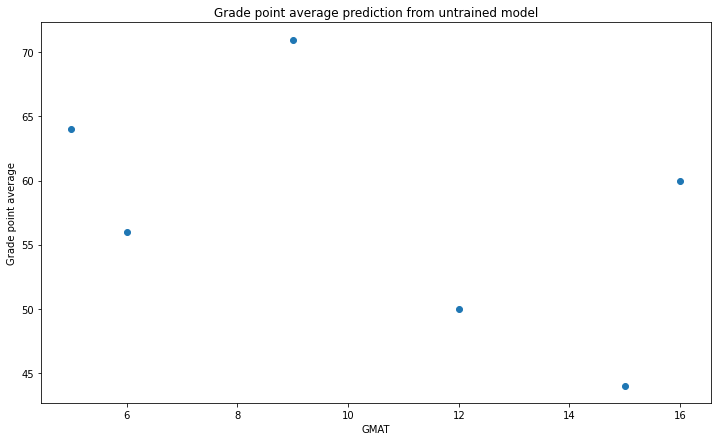

In [255]:
import matplotlib.pyplot as plt

# Generate some random data
x = data[:,0]
y = data[:,1]

# Create a scatter plot
fig = plt.figure(figsize=(12, 7))
plt.scatter(x, y)

# Add labels and title
plt.xlabel('GMAT')
plt.ylabel('Grade point average')
plt.title('Grade point average prediction from untrained model')

# Show the plot
plt.show()


In [256]:
# X, X_augmented, Y_ground vectores
X = np.array(data)[:,:-1].astype(int)
Y_ground = np.array(data)[:,-1].astype(float)
X_augmented = np.concatenate(([[1]]*len(X), X), axis=1)

# Weights to train
w = np.array([1]*len(X_augmented[0]))

# Model prediction
Y_prediction = X_augmented @ w

In [257]:
# Loss function
def sum_of_square_error_loss(Y_prediction, Y_ground):
    regularization_term = 0
    return (1/2) * np.sum((Y_prediction - Y_ground)**2) + regularization_term

In [258]:
# GRADIENT DESCENT

def getGradients(w):
    global X_augmented, Y_ground

    # Oi = (w1*xi + w0 - Yi)
    Oi = np.concatenate( 
            (X_augmented * w, -Y_ground.reshape(len(Y_ground), 1))
        , axis=1 )

    # ( Sum(Oi) * xi ) for each weight column i
    gradients = np.sum(   Oi   , axis=1) @ X_augmented

    return gradients

def gd(w, learning_rate):
    gradients = getGradients(w)
    
    while abs(gradients[0]) > 0.0001 and abs(gradients[1]) > 0.0001:
        w = w - learning_rate*gradients
        gradients = getGradients(w)
    
    return w



In [259]:
# Exercising

w_trained = gd([2, 4], 0.001)
print(w_trained)

Y_prediction = X_augmented @ w_trained

[68.19756863 -1.01883536]


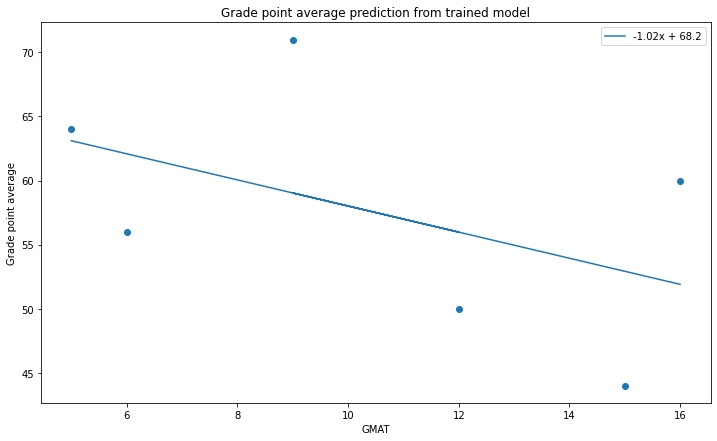

In [260]:
import matplotlib.pyplot as plt

# Generate some random data
x = data[:,0]
y = data[:,1]

# Create a scatter plot
fig = plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.plot(x, w_trained[0] + w_trained[1]*x ,label='-1.02x + 68.2')

# Add labels and title
plt.xlabel('GMAT')
plt.ylabel('Grade point average')
plt.title('Grade point average prediction from trained model')

# Show the plot
plt.legend()
plt.show()
